In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
path = 'data/housing.csv'
house = pd.read_csv(path)
house
print(house.shape)

(20640, 10)


In [26]:
house.info()
house.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
house=house.join(pd.get_dummies(house.ocean_proximity)).drop(['ocean_proximity'],axis=1)
house

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
0           322.0       126.0         8.3252            452600.0      False   
1          2401.0      1138.0         8.3014            358500.0      False   
2           496.0       177.0         7.2574            352100.0      False   
3           558.0       219.0         5.6431            341300.0      False   
4           565.0       259.0         3.8462            342200.0      False   
...           ...         ...            ...                 ...        ...   
20635       845.0       330.0         1.5603             78100.0      False   
20636       356.0       114.0         2.5568             77100.0      False   
20637      1007.0       433.0         1.7000             92300.0      False   
20638       741.0       349.0         1.8672             84700.0      False   
20639      1387.0       530.0         2.3886             89400.0      False   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0       False   False      True       False  
1       False   False      True       False  
2       False   False      True       False  
3       False   False      True       False  
4       False   False      True       False  
...       ...     ...       ...         ...  
20635    True   False     False       False  
20636    True   False     False       False  
20637    True   False     False       False  
20638    True   False     False       False  
20639    True   False     False       False  

[20433 rows x 14 columns]

In [28]:
x_data = house.drop(['median_house_value'],axis=1)
y_data=house['median_house_value']
y_data

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

<Axes: >

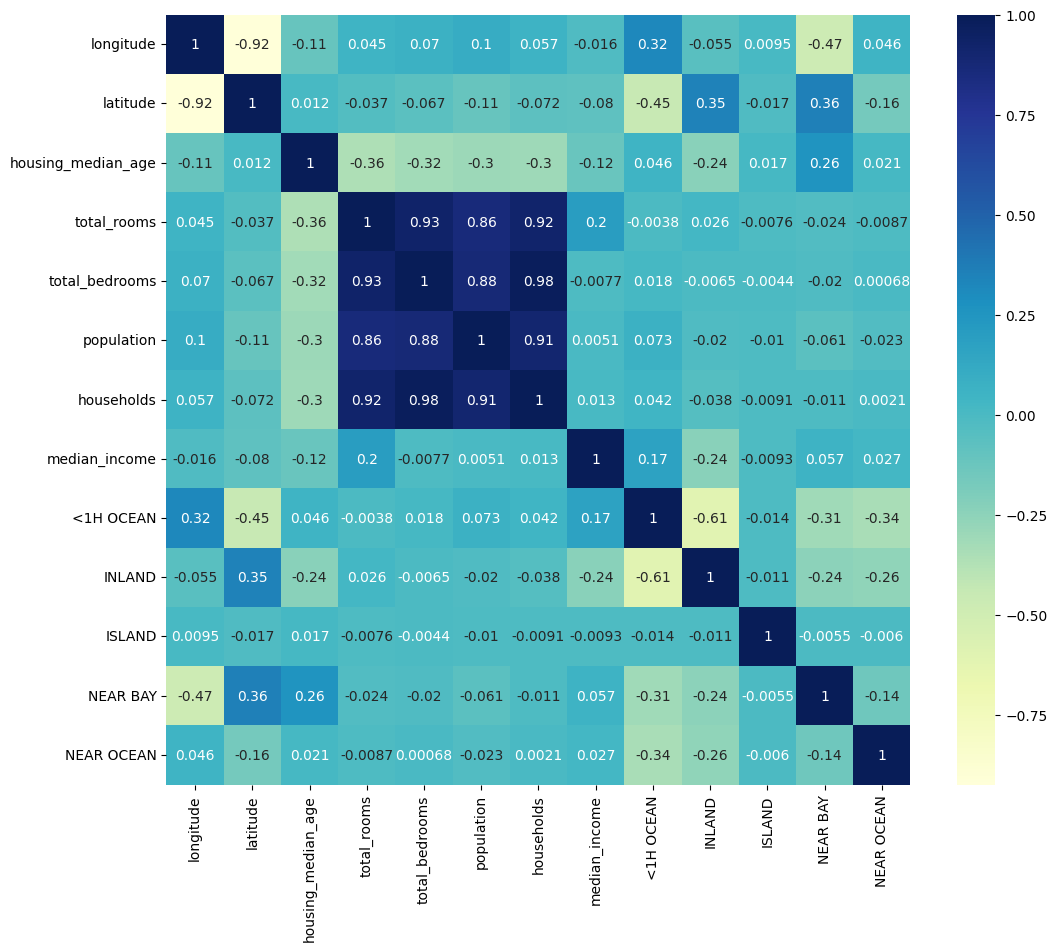

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)
plt.figure(figsize=(12,10))
sns.heatmap(x_data.corr(),annot=True,cmap='YlGnBu')

In [30]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
prediction = model.predict(x_test)
print(y_test)
print(prediction)

12074    150300.0
17733    164500.0
15728    418400.0
17952    247800.0
12203    145600.0
           ...   
87       162500.0
1458     231100.0
13432     99500.0
19822     49200.0
1561     425100.0
Name: median_house_value, Length: 4087, dtype: float64
[159913.30335194 234448.48541182 216163.21501353 ... 152434.5665775
  60865.23848181 412629.67464425]


In [32]:
print(f"{model.score(x_test,y_test)}")

0.6591441315562718
